In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define paths
results_dir = 'run_1/'

# Load eRegulons
eregulon_direct_path = os.path.join(results_dir, 'eRegulon_direct.tsv')
eregulon_extended_path = os.path.join(results_dir, 'eRegulons_extended.tsv')

if os.path.exists(eregulon_direct_path):
    df_direct = pd.read_csv(eregulon_direct_path, sep='\t', index_col=0)
    print(f"Loaded Direct eRegulons: {df_direct.shape}")
else:
    print("Direct eRegulons file not found.")

if os.path.exists(eregulon_extended_path):
    df_extended = pd.read_csv(eregulon_extended_path, sep='\t', index_col=0)
    print(f"Loaded Extended eRegulons: {df_extended.shape}")
else:
    print("Extended eRegulons file not found.")

# Load TF-Gene Adjacency
tf_gene_path = os.path.join(results_dir, 'tf_to_gene_adj.tsv')
if os.path.exists(tf_gene_path):
    df_tf_gene = pd.read_csv(tf_gene_path, sep='\t')
    print(f"Loaded TF-Gene Adjacency: {df_tf_gene.shape}")



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/apple/Developer/dcolinmorgan/pyNB/.venv/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/apple/Developer/dcolinmorgan/pyNB/.venv/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/apple/Developer/dcolinmorgan/pyNB/.venv/lib/python3.11/site-packages/ipykernel/kernel

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/apple/Developer/dcolinmorgan/pyNB/.venv/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/apple/Developer/dcolinmorgan/pyNB/.venv/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/apple/Developer/dcolinmorgan/pyNB/.venv/lib/python3.11/site-packages/ipykernel/kernel

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/apple/Developer/dcolinmorgan/pyNB/.venv/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/apple/Developer/dcolinmorgan/pyNB/.venv/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/apple/Developer/dcolinmorgan/pyNB/.venv/lib/python3.11/site-packages/ipykernel/kernel

AttributeError: _ARRAY_API not found

Loaded Direct eRegulons: (142584, 14)
Loaded Extended eRegulons: (53141, 14)
Loaded TF-Gene Adjacency: (2919103, 5)


Top 10 TFs by number of target genes (Direct):
TF
ZNF148    2954
POU2F1    2225
SF1       2083
ELF2      2012
RFX3      1925
NFIA      1891
ZNF207    1855
CHD2      1797
ZBTB20    1786
MEF2C     1730
Name: Gene, dtype: int64


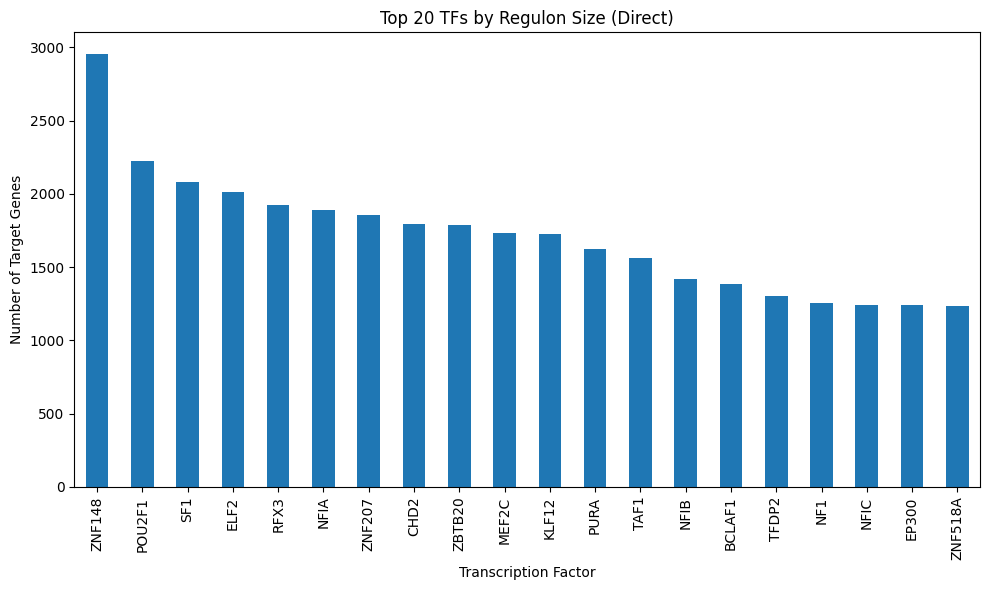


Region-to-Gene Link Stats:
       importance_R2G        rho_R2G
count   142584.000000  142584.000000
mean         0.039679       0.056572
std          0.049803       0.250826
min          0.000000      -0.775052
25%          0.009317      -0.149493
50%          0.021129       0.077606
75%          0.051269       0.214309
max          1.000000       0.913155


In [2]:
# Analyze Top Regulators in Direct eRegulons
if 'df_direct' in locals():
    # Count target genes per TF
    tf_counts = df_direct.groupby('TF')['Gene'].nunique().sort_values(ascending=False)
    
    print("Top 10 TFs by number of target genes (Direct):")
    print(tf_counts.head(10))
    
    # Plot
    plt.figure(figsize=(10, 6))
    tf_counts.head(20).plot(kind='bar')
    plt.title('Top 20 TFs by Regulon Size (Direct)')
    plt.ylabel('Number of Target Genes')
    plt.xlabel('Transcription Factor')
    plt.tight_layout()
    plt.show()

    # Analyze Region-to-Gene links
    print("\nRegion-to-Gene Link Stats:")
    print(df_direct[['importance_R2G', 'rho_R2G']].describe())


In [3]:
# Load and Visualize AUCell Enrichment Scores
aucell_path = os.path.join(results_dir, 'AUCell_direct.h5mu')

try:
    import mudata
    mdata = mudata.read(aucell_path)
    print("Loaded AUCell MuData:")
    print(mdata)
    
    # Extract AUC scores
    # SCENIC+ AUCell output typically puts scores in a modality, often named 'filter' or similar, or just the base if single
    # Let's inspect modalities
    if hasattr(mdata, 'mod') and len(mdata.mod) > 0:
        # Use the first modality if specific name unknown, or look for 'auc'
        mod_key = list(mdata.mod.keys())[0]
        auc_adata = mdata.mod[mod_key]
        print(f"Using modality '{mod_key}' for AUC scores.")
    else:
        # Fallback if it behaves like AnnData
        auc_adata = mdata
    
    print(f"AUC Matrix shape: {auc_adata.shape}")
    
    # Calculate mean activity per regulon to find top active ones
    # Convert to dense if sparse
    if hasattr(auc_adata.X, 'toarray'):
        auc_df = pd.DataFrame(auc_adata.X.toarray(), index=auc_adata.obs_names, columns=auc_adata.var_names)
    else:
        auc_df = pd.DataFrame(auc_adata.X, index=auc_adata.obs_names, columns=auc_adata.var_names)

    mean_auc = auc_df.mean().sort_values(ascending=False)
    top_regulons = mean_auc.head(20).index.tolist()
    
    print("\nTop 5 Active Regulons (Mean AUC):")
    print(mean_auc.head(5))

    # Plot heatmap of top 20 regulons for a subset of cells
    plt.figure(figsize=(12, 8))
    sns.heatmap(auc_df[top_regulons].iloc[:200], cmap='viridis', yticklabels=False)
    plt.title('Activity of Top 20 Direct eRegulons (First 200 Cells)')
    plt.xlabel('eRegulon')
    plt.ylabel('Cells')
    plt.tight_layout()
    plt.show()
    
except ImportError:
    print("mudata library not installed. Skipping AUCell visualization.")
except Exception as e:
    print(f"Error loading/plotting AUCell data: {e}")


Error loading/plotting AUCell data: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject


Number of TFs in Direct eRegulons: 99
Number of TFs in Extended eRegulons: 44


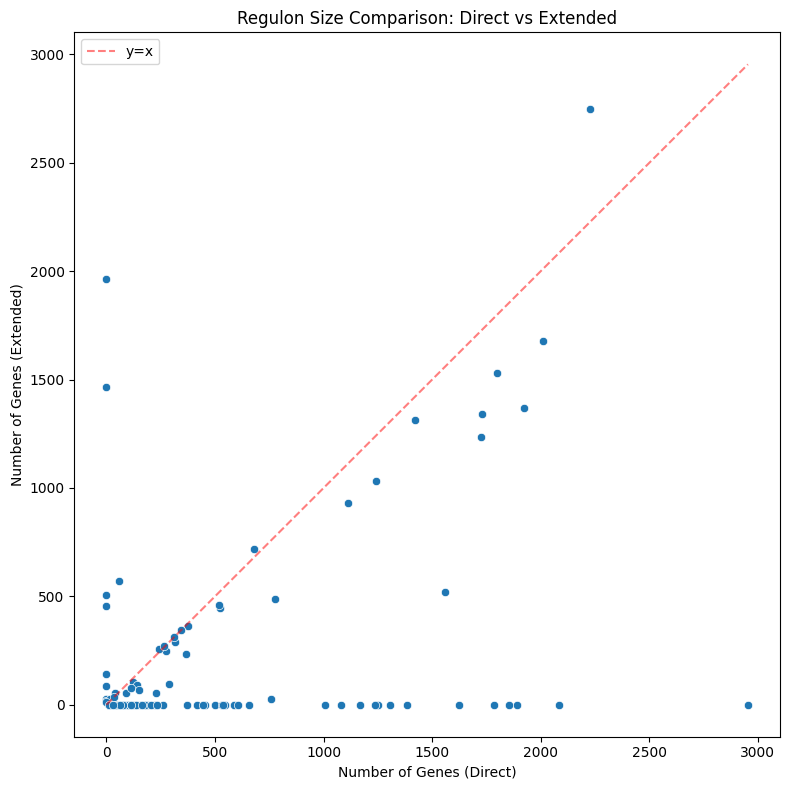

In [4]:
# Compare Direct vs Extended eRegulons
if 'df_direct' in locals() and 'df_extended' in locals():
    n_direct = df_direct['TF'].nunique()
    n_extended = df_extended['TF'].nunique()
    
    print(f"Number of TFs in Direct eRegulons: {n_direct}")
    print(f"Number of TFs in Extended eRegulons: {n_extended}")
    
    # Compare sizes (genes per TF)
    direct_sizes = df_direct.groupby('TF')['Gene'].nunique()
    extended_sizes = df_extended.groupby('TF')['Gene'].nunique()
    
    # Merge for comparison
    comp_df = pd.DataFrame({'Direct': direct_sizes, 'Extended': extended_sizes}).fillna(0)
    
    plt.figure(figsize=(8, 8))
    sns.scatterplot(data=comp_df, x='Direct', y='Extended')
    
    # Add diagonal line
    max_val = comp_df.max().max()
    plt.plot([0, max_val], [0, max_val], 'r--', alpha=0.5, label='y=x')
    
    plt.title('Regulon Size Comparison: Direct vs Extended')
    plt.xlabel('Number of Genes (Direct)')
    plt.ylabel('Number of Genes (Extended)')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [5]:
# Load GEX Metadata for Cell Type Analysis
gex_path = os.path.join(results_dir, 'GEX_anndata_sampled.h5ad')
import scanpy as sc

if os.path.exists(gex_path):
    try:
        adata_gex = sc.read_h5ad(gex_path)
        print("Loaded GEX AnnData:")
        print(adata_gex)
        
        # Identify potential cell type columns
        potential_ct_cols = [c for c in adata_gex.obs.columns if 'type' in c.lower() or 'cluster' in c.lower()]
        print(f"Potential cell type columns: {potential_ct_cols}")
        
        # If we have cell types and AUCell data, we can calculate specificity (RSS)
        # Note: RSS implementation requires the 'pyscenic' or 'scenicplus' library functions
        # Here we can do a simple visualization of regulon activity by cell type if available
        
        if len(potential_ct_cols) > 0 and 'auc_df' in locals():
            ct_col = potential_ct_cols[0] # Pick the first one
            print(f"Visualizing regulon activity by '{ct_col}'...")
            
            # Add cell type to AUC dataframe
            # Ensure indices match
            common_cells = auc_df.index.intersection(adata_gex.obs.index)
            if len(common_cells) > 0:
                plot_df = auc_df.loc[common_cells].copy()
                plot_df['CellType'] = adata_gex.obs.loc[common_cells, ct_col]
                
                # Calculate mean activity per cell type
                mean_activity = plot_df.groupby('CellType').mean()
                
                # Plot heatmap of mean activity
                plt.figure(figsize=(14, 10))
                sns.heatmap(mean_activity[top_regulons], cmap='viridis', annot=False)
                plt.title(f'Mean Regulon Activity by {ct_col}')
                plt.tight_layout()
                plt.show()
            else:
                print("No common cells between AUCell and GEX data.")
                
    except Exception as e:
        print(f"Error loading/analyzing GEX data: {e}")
else:
    print("GEX AnnData file not found.")


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [6]:
# Explore Transcription Factor Cistromes
cistromes_path = os.path.join(results_dir, 'cistromes_direct.h5ad')

if os.path.exists(cistromes_path):
    try:
        adata_cistromes = sc.read_h5ad(cistromes_path)
        print("Loaded Cistromes AnnData:")
        print(adata_cistromes)
        
        # Check for TF expression in GEX data if available
        if 'adata_gex' in locals():
            # Find common TFs
            common_tfs = list(set(adata_cistromes.var_names) & set(adata_gex.var_names))
            print(f"Number of TFs with both cistrome accessibility and expression data: {len(common_tfs)}")
            
            if len(common_tfs) > 0:
                # Calculate correlation between TF expression and Cistrome Accessibility
                # This is a simplified view; usually done per cell
                
                # Ensure cells match
                common_cells = adata_cistromes.obs_names.intersection(adata_gex.obs_names)
                if len(common_cells) > 0:
                    expr_data = adata_gex[common_cells, common_tfs].to_df()
                    acc_data = adata_cistromes[common_cells, common_tfs].to_df()
                    
                    correlations = expr_data.corrwith(acc_data)
                    
                    print("\nTop 10 TFs by Expression-Accessibility Correlation:")
                    print(correlations.sort_values(ascending=False).head(10))
                    
                    plt.figure(figsize=(10, 6))
                    sns.histplot(correlations, bins=20)
                    plt.title('Distribution of TF Expression vs Cistrome Accessibility Correlations')
                    plt.xlabel('Pearson Correlation')
                    plt.show()
                else:
                    print("No common cells found between Cistromes and GEX.")
    except Exception as e:
        print(f"Error analyzing cistromes: {e}")
else:
    print("Cistromes file not found.")


Error analyzing cistromes: name 'sc' is not defined


Loaded Region-to-Gene Links: (1574954, 7)

Top 10 Region-Gene Links by importance:
           target                    region  importance
342433   DCAF12L2  chrX:126166074-126166574         1.0
609091      HTR2C  chrX:114611052-114611552         1.0
625778    IL13RA2  chrX:115134324-115134824         1.0
924420      OR1B1  chr9:122807141-122807641         1.0
928815      OR8J3   chr11:56261045-56261545         1.0
286196   CNTNAP3C    chr9:61573573-61574073         1.0
924933     OR2A42  chr7:144378573-144379073         1.0
334298    CYP2C19   chr10:94647424-94647924         1.0
492460    FOXD4L1  chr2:113363181-113363681         1.0
1562318    ZNF658    chr9:66900486-66900986         1.0


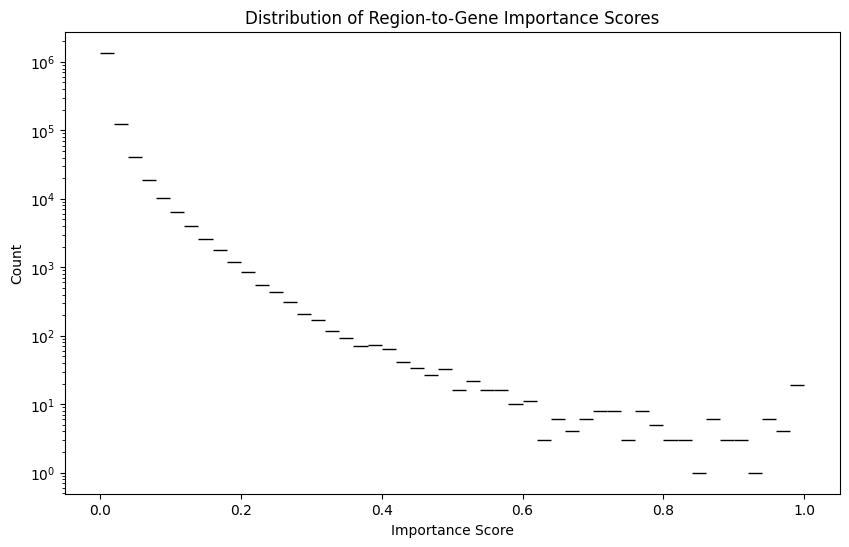


Regions regulating top gene 'DCAF12L2': 1


In [7]:
# Examine Region-to-Gene Links
r2g_path = os.path.join(results_dir, 'region_to_gene_adj.tsv')

if os.path.exists(r2g_path):
    df_r2g = pd.read_csv(r2g_path, sep='\t')
    print(f"Loaded Region-to-Gene Links: {df_r2g.shape}")
    
    # Filter for high importance links
    # Assuming 'importance' column exists, or 'importance_x_rho'
    imp_col = 'importance' if 'importance' in df_r2g.columns else 'importance_x_rho'
    
    if imp_col in df_r2g.columns:
        top_links = df_r2g.sort_values(imp_col, ascending=False).head(1000)
        
        print(f"\nTop 10 Region-Gene Links by {imp_col}:")
        print(top_links[['target', 'region', imp_col]].head(10))
        
        # Plot distribution of importance scores
        plt.figure(figsize=(10, 6))
        sns.histplot(df_r2g[imp_col], bins=50, log_scale=(False, True))
        plt.title('Distribution of Region-to-Gene Importance Scores')
        plt.xlabel('Importance Score')
        plt.show()
        
        # Visualize network for a top gene
        top_gene = top_links['target'].iloc[0]
        gene_links = top_links[top_links['target'] == top_gene]
        
        print(f"\nRegions regulating top gene '{top_gene}': {len(gene_links)}")
    else:
        print("Importance column not found in R2G file.")
else:
    print("Region-to-Gene file not found.")


In [10]:
# Identify Top Regulators via Specificity (RSS)
# This requires the 'pyscenic' library for the rss function, or we can implement a simple version
# RSS = 1 - sum(p_i * log(p_i)) ... it's based on Jensen-Shannon divergence

def calculate_rss(auc_df, cell_type_series):
    """
    Simple implementation of Regulon Specificity Score (RSS).
    """
    from scipy.spatial.distance import jensenshannon
    
    # Binarize cell types
    cell_types = cell_type_series.unique()
    rss_results = pd.DataFrame(index=auc_df.columns, columns=cell_types)
    
    for ct in cell_types:
        # Create binary vector for this cell type
        ct_binary = (cell_type_series == ct).astype(int)
        # Normalize to probability distribution
        P = ct_binary / ct_binary.sum()
        
        # For each regulon, normalize AUC to probability distribution
        for regulon in auc_df.columns:
            R = auc_df[regulon]
            Q = R / R.sum()
            
            # Calculate JS divergence
            # RSS = 1 - JSD(P, Q) ?? Actually RSS is usually defined specifically for SCENIC
            # Standard SCENIC RSS:
            # RSS(R, C) = 1 - JSD(P_R, P_C)
            # Where P_R is regulon activity distribution, P_C is cell type distribution
            
            jsd = jensenshannon(P, Q)
            rss_results.loc[regulon, ct] = 1 - jsd
            
    return rss_results

if 'auc_df' in locals() and 'adata_gex' in locals() and len(potential_ct_cols) > 0:
    try:
        ct_col = potential_ct_cols[0]
        common_cells = auc_df.index.intersection(adata_gex.obs.index)
        
        if len(common_cells) > 0:
            subset_auc = auc_df.loc[common_cells]
            subset_ct = adata_gex.obs.loc[common_cells, ct_col]
            
            print("Calculating RSS (this may take a moment)...")
            rss_df = calculate_rss(subset_auc, subset_ct)
            
            print("\nTop Regulators per Cell Type:")
            for ct in rss_df.columns:
                top_tf = rss_df[ct].sort_values(ascending=False).head(3)
                print(f"\n{ct}:")
                print(top_tf)
                
            # Plot RSS for one cell type
            ct_to_plot = rss_df.columns[0]
            plt.figure(figsize=(10, 6))
            rss_df[ct_to_plot].sort_values(ascending=False).head(20).plot(kind='bar')
            plt.title(f'Top Specific Regulons for {ct_to_plot}')
            plt.ylabel('RSS')
            plt.tight_layout()
            plt.show()
            
    except Exception as e:
        
        print(f"Error calculating RSS: {e}")
